In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from matplotlib.colors import LogNorm

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Cluster_data/C2_CP_PEA_PITCH_SPIN_DEFlux__20040302_085105_20040302_101929_V170624.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 time_tags__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1320]
1 time_tags_DeltaLower__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
2 time_tags_DeltaUpper__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
3 Angle_SR2phi__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
4 Mode_SunpulseRephaseOffset__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
5 Mode_Sensor__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
6 Mode_SweepMode_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
7 Mode_Preset_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
8 Mode_EnergyLevelRange_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320, 2]
9 Mode_EnergyMaxMin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320, 2]
10 Mode_MCPlevel_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
11 Mode_DataOrigin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
12 Mode_SweepMode_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
13 Mode_Preset_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
14 Mode_EnergyLevelRange_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux 

In [3]:
epoch = cdf[0][...]
data = cdf[26][...]
energy = cdf[20][...]
pa = cdf[23][...]
#az = cdf[20][...]
#data = [epoch,az,pa,energy] for 3DRH
#data = [epoch,pa,energy] for PITCH_SPIN

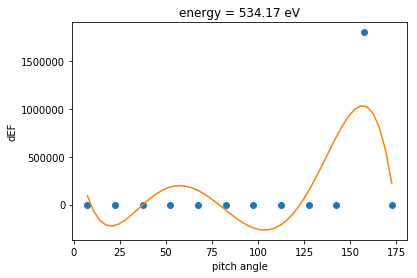

FWHM =  9


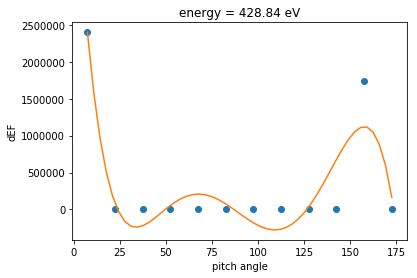

FWHM =  1


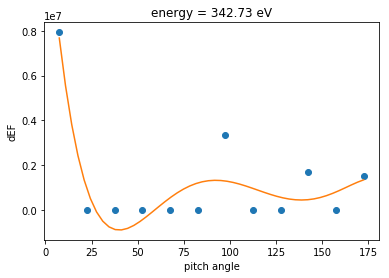

FWHM =  1


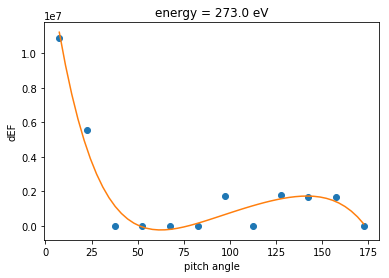

FWHM =  3


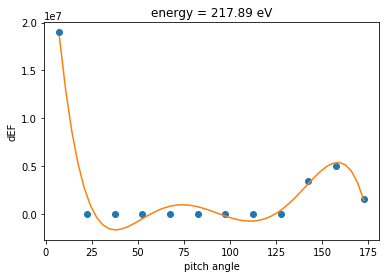

FWHM =  1


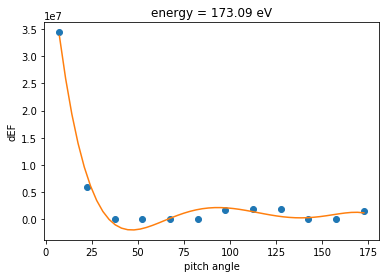

FWHM =  2


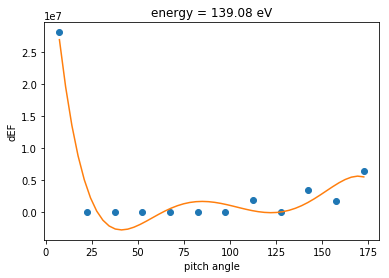

FWHM =  2


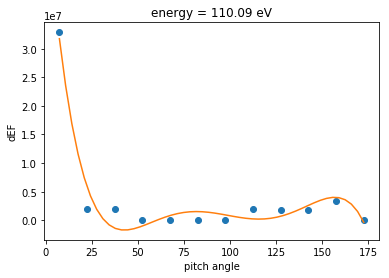

FWHM =  2


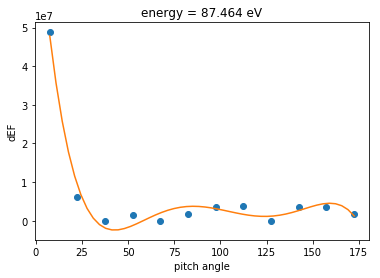

FWHM =  2


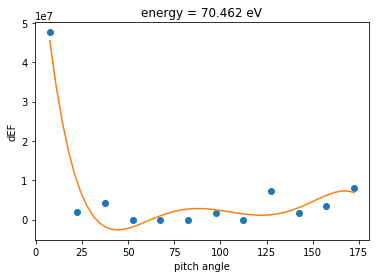

FWHM =  2


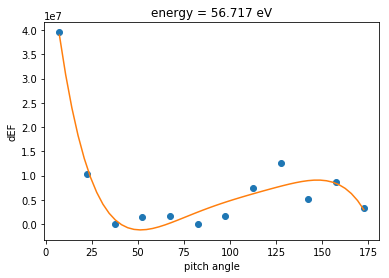

FWHM =  2


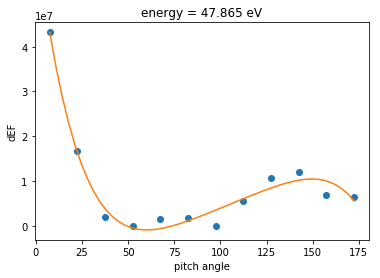

FWHM =  3


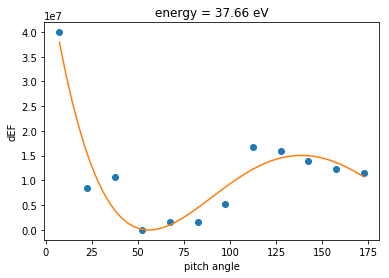

FWHM =  3


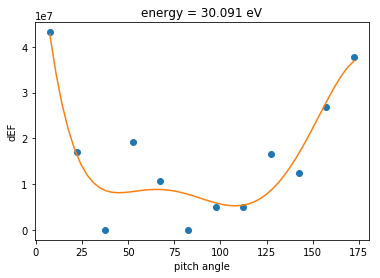

FWHM =  49


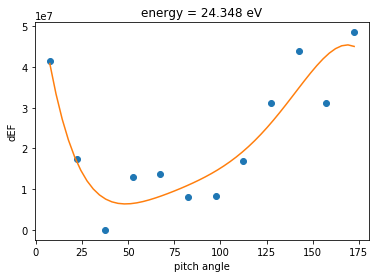

FWHM =  49
energies =  [2531.    2030.1   1621.7   1296.2   1039.9    832.28   669.21   534.17
  428.84   342.73   273.     217.89   173.09   139.08   110.09    87.464
   70.462   56.717   47.865   37.66    30.091   24.348   19.568   15.779
   12.543   10.073    8.47     7.294    6.251    5.252]
[  7.5  22.5  37.5  52.5  67.5  82.5  97.5 112.5 127.5 142.5 157.5 172.5]


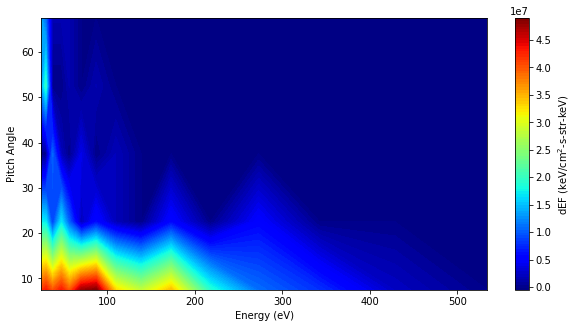

In [4]:
#3D resolution plotting:
#for j in range(16):
#        X, Y = np.meshgrid(pa, az[13])
#        fig = plt.figure(figsize=(10,5))
#        ax = plt.axes(projection='3d')
#        #ax = plt.axes()
#        D = data[13,0:len(az[13]),0:len(pa),j]
#        surf = ax.contourf(Y, X, D, 100, cmap=cm.jet)
#        cbar = fig.colorbar(surf)
#        cbar.set_label('Density')
#        ax.set_ylabel('Pitch Angle')
#        ax.set_xlabel('Azimuth')
#        ax.set_zlabel('Density')

time = 10

#PITCH_SPIN line plotting:

for n in range(7,22):
    y = data[time,0:12,n]
    #plt.plot(pa,y)
    
    t = np.polyfit(pa[0:12], y, 5)
    f = np.poly1d(t)
    pa_new = np.linspace(pa[0], pa[11], 50)
    y_new = f(pa_new)
    plt.plot(pa[0:12],y,'o', pa_new, y_new)
    plt.title("energy = " + str(energy[time,n]) + " eV")
    plt.xlabel("pitch angle")
    plt.ylabel("dEF")
    plt.show()
    xs = [x for x in range(50) if y_new[x] > np.max(y_new)/2.0]
    if np.mean(y_new)>0:
        fwhm = np.max(xs)-np.min(xs)
        print('FWHM = ', fwhm)
    
#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy[time,7:22],pa[0:5])
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = data[time,0:5,7:22]
surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.set_label('dEF (keV/cm$^{2}$-s-str-keV)')
ax.set_ylabel('Pitch Angle')
ax.set_xlabel('Energy (eV)')
#ax.set_xlim(0,5)

print('energies = ', energy[time,0:30])
print(pa)

# Curve_fit Gaussian

amplitude =  41025070.72757372
x_mean =  98.77494101340743 Log(eV)
[33535294. 33521736.]


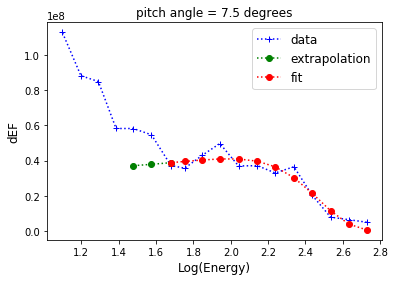

In [8]:
#1D Gaussian

time = 70
x = (energy[time,7:19])
y = (data[time,0,7:19])

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),mean,sigma],maxfev=10000)

x_scale = np.log10(energy[time,7:25])

plt.plot(x_scale,(data[time,0,7:25]),'b+:',label='data')
plt.plot(np.log10(energy[time,18:21]),gaus((energy[time,18:21]),*popt),'go:',label='extrapolation')
plt.plot(np.log10(energy[time,7:19]),gaus((energy[time,7:19]),*popt),'ro:',label='fit')
plt.xlabel("Log(Energy)",fontsize=12)
plt.ylabel("dEF",fontsize=12)
plt.title("pitch angle = 7.5 degrees",fontsize=12)
plt.legend(fontsize=12)
print("amplitude = ", popt[0])
print("x_mean = ", popt[1], "Log(eV)")
print(gaus(np.log10(energy[time,19:21]),*popt))

In [47]:
#2D Gaussian

def gauss2d(xy, amp, x0, y0, a, b, c):
    x, y = xy
    inner = a * (x - x0)**2
    inner += 2 * b * (x - x0)**2 * (y - y0)**2
    inner += c * (y - y0)**2
    return amp * np.exp(-inner)

def Fit2DGauss(x, y, z):
    guess = (1e4,50,10,1,1,1)
    pred_params, uncert_cov = curve_fit(gauss2d, (x,y), z, p0=guess)

    yi, xi = np.meshgrid(energy[10,0:30],pa[0:12])
    xyi = np.vstack([xi.ravel(), yi.ravel()])

    zpred = gauss2d(xyi, *pred_params)
    zpred.shape = xi.shape
    extent=[xi.min(), xi.max(), yi.max(), yi.min()]

    perr = np.sqrt(np.diag(uncert_cov))

    # print 'Amp: ', pred_params[0], '+/-', perr[0]
    # print 'X_0: ', pred_params[1], '+/-', perr[1]
    # print 'Y_0: ', pred_params[2], '+/-', perr[2]

    return zpred, extent, pred_params, perr

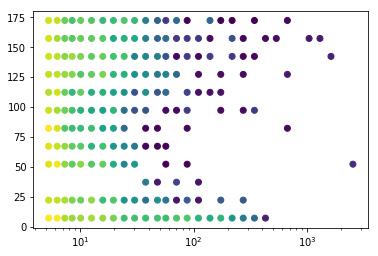

In [48]:
x = np.tile(energy[10,0:30], 12)
y = pa[0:12].repeat(30)
z = data[10,0:12,0:30].flatten()


fig, ax = plt.subplots(1)

ax.scatter(x, y, c = z, norm = colors.LogNorm())
ax.set_xscale('log')

plt.show()

Z, extent, param, perr = Fit2DGauss(np.tile(energy[10,0:30],12),np.tile(pa[0:12],30),data[10,0:12,0:30].flatten())

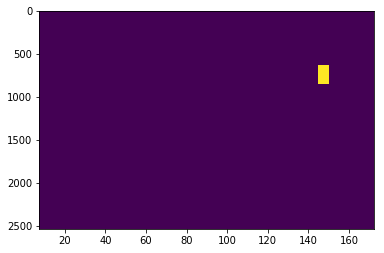

In [49]:
fig, ax = plt.subplots(1)
ax.imshow(Z, extent = extent, aspect='auto')
plt.show()


In [50]:
param


array([1.e+04, 5.e+01, 1.e+01, 1.e+00, 1.e+00, 1.e+00])

# Gaussian Mixture

In [46]:
time = 590
e1 = 7
e2 = 19
p1 = 0
p2 = 4
x = np.tile(np.log10(energy[time,e1:e2]), p2-p1)
y = pa[p1:p2].repeat(e2-e1)
z = data[time,p1:p2,e1:e2].flatten()
xy = [[i,j] for i,j in zip(x,y)]

In [47]:
z = [int(i/100000) if i != 0 else 1.0 for i in z] 

In [48]:
xy_real = np.array([[j for i in z] for j in xy])
print(xy_real.shape)

(48, 48, 2)


In [49]:
listofstuff = []
for n, item in enumerate(z):
    for m in range(0, int(item)):
        listofstuff.append(xy[n])


In [50]:
listofstuff = np.array(listofstuff)
np.shape(listofstuff)

(3712, 2)

In [51]:
clf = mixture.BayesianGaussianMixture(n_components=1, covariance_type='full')
clf.fit(listofstuff)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=1, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

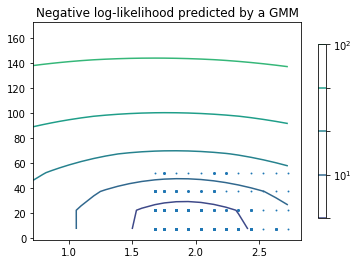

In [62]:
x = np.log10(energy[time,7:30])
y = pa[0:12]
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(listofstuff[:, 0], listofstuff[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()